In [27]:
import pandas as pd
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt
import math

In [28]:
import sys
sys.path.append('../../common/')
from data_normalization_functions import *
from data_visualization_functions import *
from data_quality_analysis_functions import *

In [29]:
batch = 6

In [30]:
df = pd.read_csv('../../CF_output/combined/batch' + str(batch) + '_constructiveness_and_toxicity_combined.csv')

In [31]:
df.shape

(1039, 25)

In [32]:
df.columns

Index(['article_id', 'article_author', 'article_published_date',
       'article_title', 'article_url', 'article_text', 'comment_author',
       'comment_counter', 'comment_text', 'agree_constructiveness_expt',
       'agree_toxicity_expt', 'constructive', 'constructive_internal_gold',
       'crowd_toxicity_level', 'crowd_toxicity_level_internal_gold',
       'has_content', 'crowd_discard', 'constructive_characteristics',
       'non_constructive_characteristics', 'toxicity_characteristics',
       'crowd_comments_constructiveness_expt', 'crowd_comments_toxicity_expt',
       'other_con_chars', 'other_noncon_chars', 'other_toxic_chars'],
      dtype='object')

# Distribution of constructiveness (Check if it's skewed)

In [33]:
df['constructive_nominal'] = df['constructive'].apply(nominalize_constructiveness)

In [34]:
cdict = df['constructive_nominal'].value_counts().to_dict()

[47.0, 38.0, 15.0]


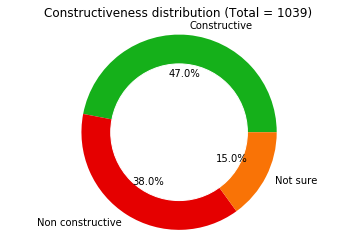

In [35]:
# Plot constructiveness distribution in the data
# The slices will be ordered and plotted counter-clockwise.
labels = 'Constructive', 'Non constructive', 'Not sure'
items =[cdict['yes'], cdict['no'], cdict['not_sure']]
total = sum(cdict.values())
size =[round(item/float(total) * 100) for item in items]
print(size)
colors = ['xkcd:green', 'xkcd:red', 'xkcd:orange']
plot_donut_chart(size,labels,colors, 'Constructiveness distribution (Total = '  + str(total) + ')')

# Distribution of toxicity (Check if skewed)

In [36]:
df['crowd_toxicity_level_nominal'] = df['crowd_toxicity_level'].apply(nominalize_toxicity)

{'Very toxic': 1, 'Toxic': 17, 'Mildly toxic': 254, 'Not toxic': 767}


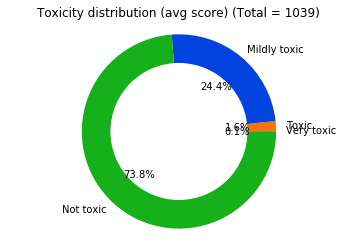

In [37]:
# Plot toxicity distribution with context (avg score)
toxicity_counts_dict = {'Very toxic':0, 'Toxic':0, 'Mildly toxic':0, 'Not toxic':0}
toxicity_counts_dict.update(df['crowd_toxicity_level_nominal'].value_counts().to_dict())
print(toxicity_counts_dict)
total = sum(toxicity_counts_dict.values())

# The slices will be ordered and plotted counter-clockwise.
labels = 'Very toxic', 'Toxic', 'Mildly toxic', 'Not toxic'
size=[toxicity_counts_dict['Very toxic'],toxicity_counts_dict['Toxic'],toxicity_counts_dict['Mildly toxic'],toxicity_counts_dict['Not toxic']]
colors = ['xkcd:red', 'xkcd:orange', 'xkcd:blue', 'xkcd:green']
plot_donut_chart(size,labels,colors, 'Toxicity distribution (avg score) (Total = '  + str(total) + ')')

# Distribution of toxicity in constructive and non-constructive comments (Check if the dists are very different)

# Plot toxicity distribution for constructive comments

In [38]:
toxicity_column_name = 'crowd_toxicity_level_nominal'

In [39]:
constructive_very_toxic = df[(df['constructive_nominal'] == 'yes') & (df[toxicity_column_name] == 'Very toxic')].shape[0]
print('Constructive very toxic: ', constructive_very_toxic)
constructive_toxic = df[(df['constructive_nominal'] == 'yes') & (df[toxicity_column_name] == 'Toxic')].shape[0]
print('Constructive toxic: ', constructive_toxic)
constructive_mildly_toxic = df[(df['constructive_nominal'] == 'yes') & (df[toxicity_column_name] == 'Mildly toxic')].shape[0]                               
print('Constructive mildly toxic: ', constructive_mildly_toxic)
constructive_not_toxic = df[(df['constructive_nominal'] == 'yes') & (df[toxicity_column_name] == 'Not toxic')].shape[0]
print('Constructive non toxic: ', constructive_not_toxic)

Constructive very toxic:  0
Constructive toxic:  2
Constructive mildly toxic:  102
Constructive non toxic:  383


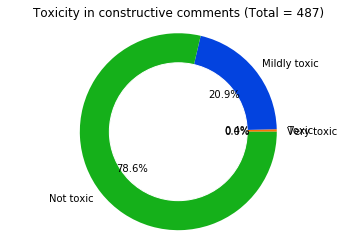

In [40]:
labels = 'Very toxic', 'Toxic', 'Mildly toxic', 'Not toxic'
size=[constructive_very_toxic, constructive_toxic, constructive_mildly_toxic, constructive_not_toxic]
total = sum(size)
colors = ['xkcd:red', 'xkcd:orange', 'xkcd:blue', 'xkcd:green']
plot_donut_chart(size,labels,colors, 'Toxicity in constructive comments (Total = '  + str(total) + ')')

# Plot toxicity distribution for non-constructive comments

In [41]:
# Plot toxicity (with context) distribution for non constructive comments
nconstructive_very_toxic = df[(df['constructive_nominal'] == 'no') & (df[toxicity_column_name] == 'Very toxic')].shape[0]
print('Non constructive very toxic: ', nconstructive_very_toxic)
nconstructive_toxic = df[(df['constructive_nominal'] == 'no') & (df[toxicity_column_name] == 'Toxic')].shape[0]
print('Non constructive toxic: ', nconstructive_toxic)
nconstructive_mildly_toxic = df[(df['constructive_nominal'] == 'no') & (df[toxicity_column_name] == 'Mildly toxic')].shape[0]                               
print('Non constructive mildly toxic: ', nconstructive_mildly_toxic)
nconstructive_not_toxic = df[(df['constructive_nominal'] == 'no') & (df[toxicity_column_name] == 'Not toxic')].shape[0]
print('Non constructive non toxic: ', nconstructive_not_toxic)

Non constructive very toxic:  1
Non constructive toxic:  12
Non constructive mildly toxic:  112
Non constructive non toxic:  275


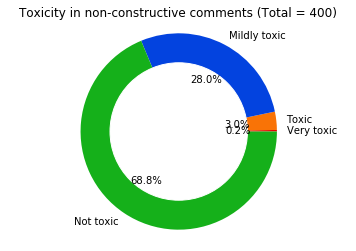

In [42]:
labels = 'Very toxic', 'Toxic', 'Mildly toxic', 'Not toxic'
size=[nconstructive_very_toxic, nconstructive_toxic, nconstructive_mildly_toxic, nconstructive_not_toxic]
total = sum(size)
colors = ['xkcd:red', 'xkcd:orange', 'xkcd:blue', 'xkcd:green']
plot_donut_chart(size,labels,colors,'Toxicity in non-constructive comments (Total = '  + str(total) + ')')

# Plot toxicity distribution for ambiguous comments

In [43]:
# Plot toxicity (with context) distribution for ambiguous comments
ns_very_toxic = df[(df['constructive_nominal'] == 'not_sure') & (df[toxicity_column_name] == 'Very toxic')].shape[0]
print('Ambiguous very toxic: ', ns_very_toxic)
ns_toxic = df[(df['constructive_nominal'] == 'not_sure') & (df[toxicity_column_name] == 'Toxic')].shape[0]
print('Ambiguous toxic: ', ns_toxic)
ns_mildly_toxic = df[(df['constructive_nominal'] == 'not_sure') & (df[toxicity_column_name] == 'Mildly toxic')].shape[0]                               
print('Ambiguous mildly toxic: ', ns_mildly_toxic)
ns_not_toxic = df[(df['constructive_nominal'] == 'not_sure') & (df[toxicity_column_name] == 'Not toxic')].shape[0]
print('Ambiguous non toxic: ', ns_not_toxic)

Ambiguous very toxic:  0
Ambiguous toxic:  3
Ambiguous mildly toxic:  40
Ambiguous non toxic:  109


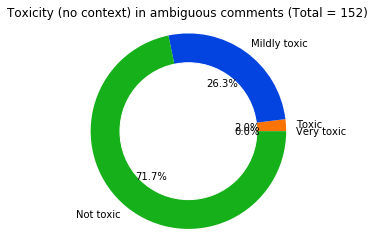

In [44]:
labels = 'Very toxic', 'Toxic', 'Mildly toxic', 'Not toxic'
size=[ns_very_toxic, ns_toxic, ns_mildly_toxic, ns_not_toxic]
total = sum(size)
colors = ['xkcd:red', 'xkcd:orange', 'xkcd:blue', 'xkcd:green']
plot_donut_chart(size,labels,colors, 'Toxicity (no context) in ambiguous comments (Total = '  + str(total) + ')')

# Check how the annotators did on internal gold questions

In [45]:
# Starting from batch three we have included internal gold questions for toxicity and constructiveness (20 each) with 
# internal_gold_constructiveness flag True. In the code below, we examine to what extent the annotators agreed with 
# these internal gold questions. 

In [46]:
# Get a subset dataframe with internal gold questions for constructiveness
internal_gold_con_df = df[df['constructive_internal_gold'].notnull()].copy()

In [47]:
# Call secret_gold_evaluation_constructiveness function from data_quality_analysis_functions
print('Disagreement on constructiveness secret gold questions (%): ', secret_gold_evaluation_constructiveness(internal_gold_con_df))

Disagreement on constructiveness secret gold questions (%):  5.0


In [48]:
# Get a subset dataframe with internal gold questions for toxicity
internal_gold_tox_df = df[df['crowd_toxicity_level_internal_gold'].notnull()].copy()

In [49]:
# Call secret_gold_evaluation_toxicity function from data_quality_analysis_functions
print('Disagreement on toxicity secret gold questions (%): ', secret_gold_evaluation_toxicity(internal_gold_tox_df))

Disagreement on toxicity secret gold questions (%):  25.0
